In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
@author: M Arshad Zahangir Chowdhury

Analytics for VOC-Thz dataset

"""

%matplotlib inline 

import sys
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import signal
from ipywidgets import interactive
import seaborn as sns  #heat map
import glob # batch processing of images

if '../../' not in sys.path:
    sys.path.append('../../')

from vocnet.spectral_datasets.THz_datasets import THz_data

from vocnet.misc.analytics import plot_compound_counts
from vocnet.misc.analytics import plot_dataset_property
from vocnet.misc.analytics import load_exp_spectra

import matplotlib.ticker as mticker


## load VOC THz spectra

In [2]:
s = THz_data(resolution=0.016, verbosity=True)
s.load_THz_data()
s.dataset_info()

Number of Compounds: 12
Number of Spectrum: 164
Total Number of Spectra: 1968
Sample Size of training data: 229
Rows discarded: 22
Resolution (1/cm) =  0.016
Loading CH3Cl... 
CH3Cl Data in Memory 
Loading CH3OH... 
CH3OH Data in Memory 
Loading HCOOH... 
HCOOH Data in Memory 
Loading H2CO... 
H2CO Data in Memory 
Loading H2S... 
H2S Data in Memory 
Loading SO2... 
SO2 Data in Memory 
Loading OCS... 
OCS Data in Memory 
Loading HCN... 
HCN Data in Memory 
Loading CH3CN... 
CH3CN Data in Memory 
Loading HNO3... 
HNO3 Data in Memory 
Loading C2H5OH... 
C2H5OH Data in Memory 
Loading CH3CHO... 
CH3CHO Data in Memory 
shape of spectra (features): (1968, 229)
shape of labels: (1968,)

 no. of discarded rows 22

 samplesize (no. of sampling points) 229

 labels of molecules present 
 ['CH3Cl', 'CH3OH', 'HCOOH', 'H2CO', 'H2S', 'SO2', 'OCS', 'HCN', 'CH3CN', 'HNO3', 'C2H5OH', 'CH3CHO']

 target indices (integers) of molecules present [ 0  0  0 ... 11 11 11]

 frequencies present in the data 
  

## visualize the THz spectra

In [3]:
def f_spectra(spectra_no):
    plt.plot(s.frequencies, s.spectra[spectra_no]); #reshape needed so you have 367 datapoints.
#     plt.ylim(-0.5, 5)
    plt.grid(True)
    plt.show()

interactive_plot = interactive(f_spectra, spectra_no=(0, s.spectra.shape[0]-1))
output = interactive_plot.children[-1]
interactive_plot

interactive(children=(IntSlider(value=983, description='spectra_no', max=1967), Output()), _dom_classes=('widg…

In [4]:
s.make_dataframe(s.spectra)
spectraframe = s.spectraframe
spectraframe['mean_abs'] = spectraframe.drop(labels=['labels','targets'],axis = 1).mean(axis = 1)
spectraframe['norm_std_abs'] = spectraframe.drop(labels=['labels','targets'],axis = 1).std(axis = 1)/spectraframe.drop(labels=['labels','targets'],axis = 1).mean(axis = 1)
spectraframe['norm_max_abs'] = spectraframe.drop(labels=['labels','targets'],axis = 1).max(axis = 1)/spectraframe.drop(labels=['labels','targets'],axis = 1).mean(axis = 1)

# analytics for training and testing data

In [5]:
spectraframe

,0,1,2,3,4,5,6,7,8,9,...,224,225,226,227,228,labels,targets,mean_abs,norm_std_abs,norm_max_abs
0,0.000839,0.000744,0.000641,0.000483,0.000436,0.000396,0.000361,0.000114,0.000098,0.000157,...,2.447183e-03,2.200062e-03,1.993512e-03,1.789412e-03,1.568732e-03,CH3Cl,0,0.085247,3.457232,34.626317
1,0.001436,0.001310,0.001265,0.001164,0.001100,0.001032,0.000993,0.000950,0.000960,0.001265,...,4.616761e-03,4.125359e-03,3.711427e-03,3.389000e-03,3.107170e-03,CH3Cl,0,0.109811,3.019012,24.664128
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.042881e-57,1.852548e-57,4.158853e-57,1.643571e-56,1.026757e-54,CH3Cl,0,0.032450,5.374430,96.705015
3,0.000736,0.000612,0.000471,0.000423,0.000382,0.000347,0.000000,0.000000,0.000000,0.000034,...,2.140642e-03,1.903000e-03,1.699188e-03,1.505340e-03,1.032503e-03,CH3Cl,0,0.079957,3.575563,37.602052
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,8.252283e-58,3.292975e-57,1.026690e-54,CH3Cl,0,0.016174,6.618444,147.881994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1963,0.004147,0.004887,0.004637,0.001771,0.002681,0.003597,0.003974,0.033576,0.016339,0.030489,...,5.665483e-01,6.643810e-01,2.089046e-01,1.040578e-01,2.760949e-02,CH3CHO,11,0.061872,1.893636,27.128915
1964,0.009573,0.010554,0.016534,0.006650,0.008734,0.011652,0.026568,0.121507,0.047725,0.068742,...,1.602626e+00,1.388449e+00,6.743952e-01,3.561444e-01,1.136959e-01,CH3CHO,11,0.166181,1.580007,9.301269
1965,0.009669,0.010676,0.016714,0.006751,0.008847,0.011841,0.027075,0.122662,0.048394,0.069268,...,1.618317e+00,1.398770e+00,6.821398e-01,3.604988e-01,1.156360e-01,CH3CHO,11,0.167967,1.576288,9.297274
1966,0.016704,0.019250,0.026494,0.014613,0.017417,0.024477,0.055747,0.167275,0.081007,0.092281,...,2.297185e+00,1.870319e+00,1.045146e+00,5.694343e-01,2.224099e-01,CH3CHO,11,0.253470,1.428838,8.884601


In [6]:
X = s.spectra
y = s.targets
labels = s.labels
n_compounds = s.n_compounds
n_spectrum = s.n_spectrum
n_spectra = s.n_compounds*s.n_spectrum
samplesize = s.samplesize
wavenumbers = s.frequencies

In [7]:
from sklearn.model_selection import train_test_split
TRAIN_SIZE=0.70
TEST_SIZE=1-TRAIN_SIZE

indices = np.arange(n_spectra)

train_X, test_X, train_y, test_y, train_indices, test_indices = train_test_split(X, y, indices, train_size=TRAIN_SIZE,
                                                   test_size=TEST_SIZE,
                                                   random_state=123,
                                                   stratify=y
                                                   )

print("All:", np.bincount(y) / float(len(y))*100  )
print("Training:", np.bincount(train_y) / float(len(train_y))*100  )
print("Testing:", np.bincount(test_y) / float(len(test_y))*100  )



All: [8.33333333 8.33333333 8.33333333 8.33333333 8.33333333 8.33333333
 8.33333333 8.33333333 8.33333333 8.33333333 8.33333333 8.33333333]
Training: [8.35148874 8.35148874 8.2788671  8.35148874 8.35148874 8.35148874
 8.2788671  8.35148874 8.35148874 8.35148874 8.35148874 8.2788671 ]
Testing: [8.29103215 8.29103215 8.46023689 8.29103215 8.29103215 8.29103215
 8.46023689 8.29103215 8.29103215 8.29103215 8.29103215 8.46023689]


In [8]:
train_sf = spectraframe.iloc[train_indices].sort_index()
test_sf = spectraframe.iloc[test_indices].sort_index()




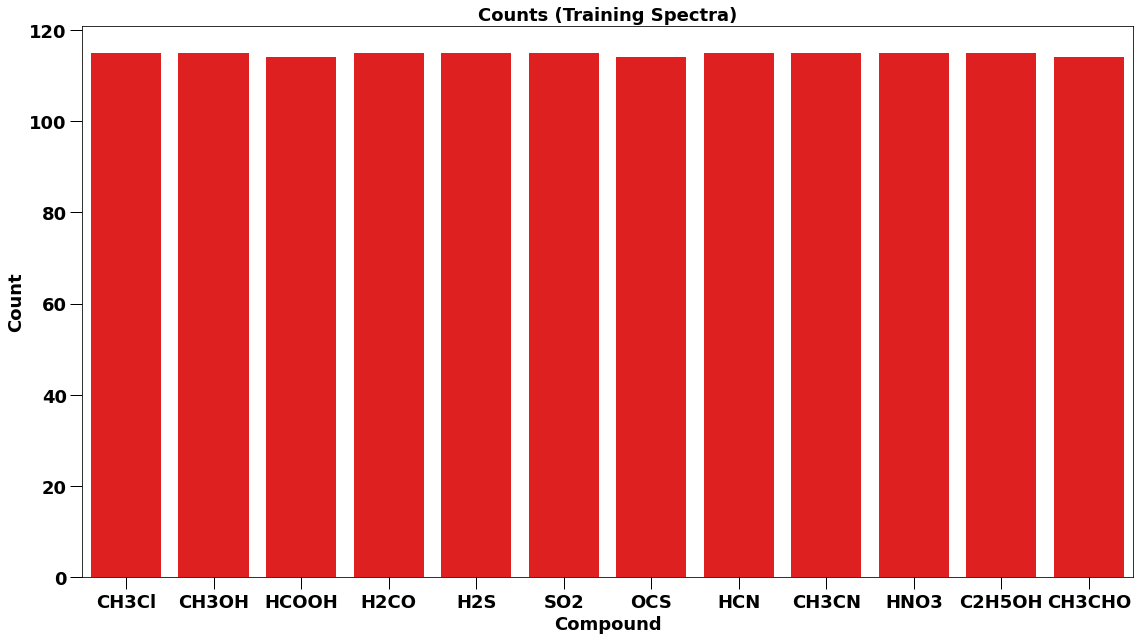

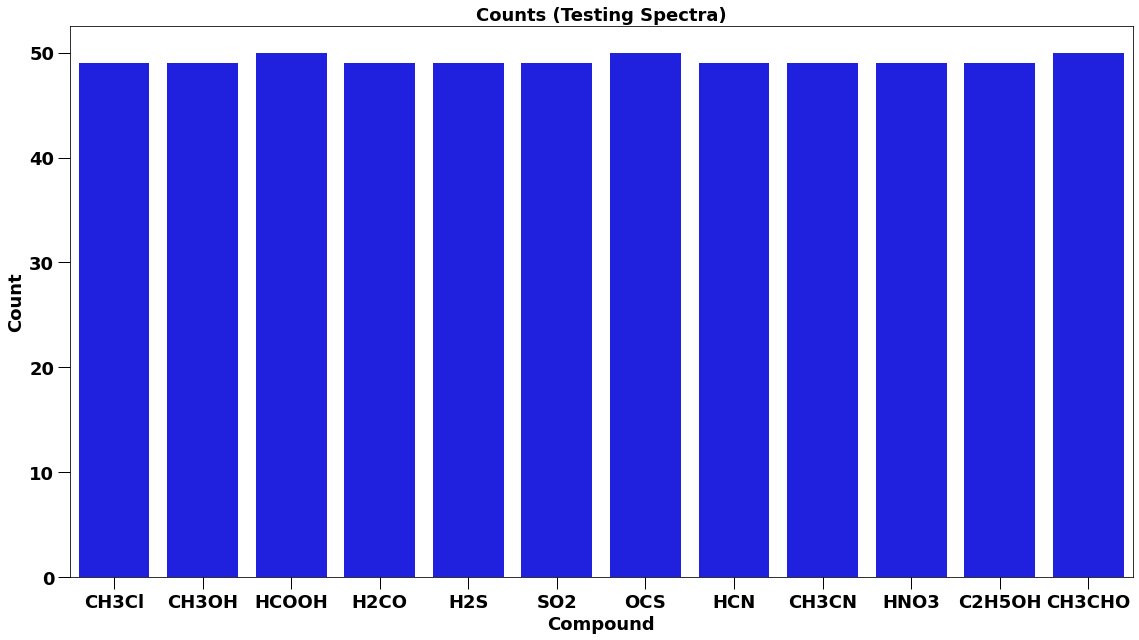

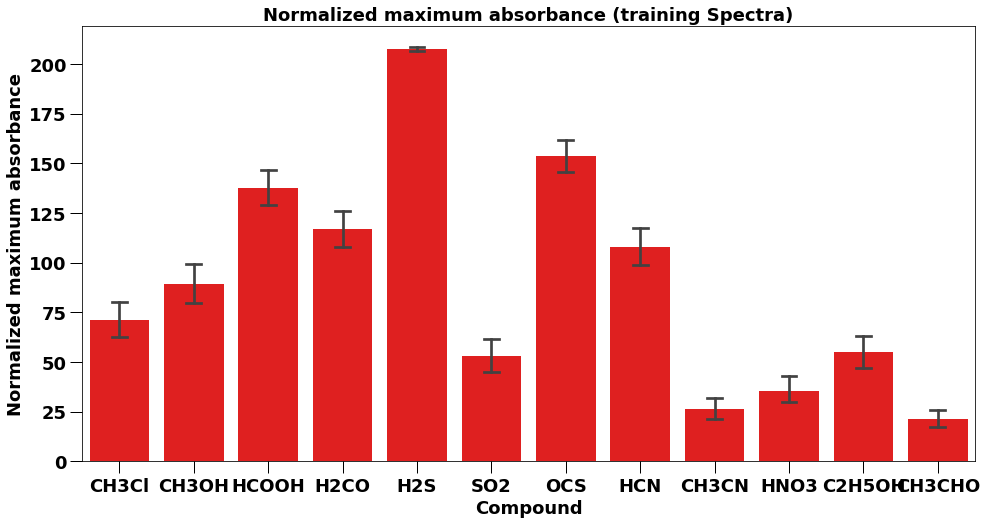

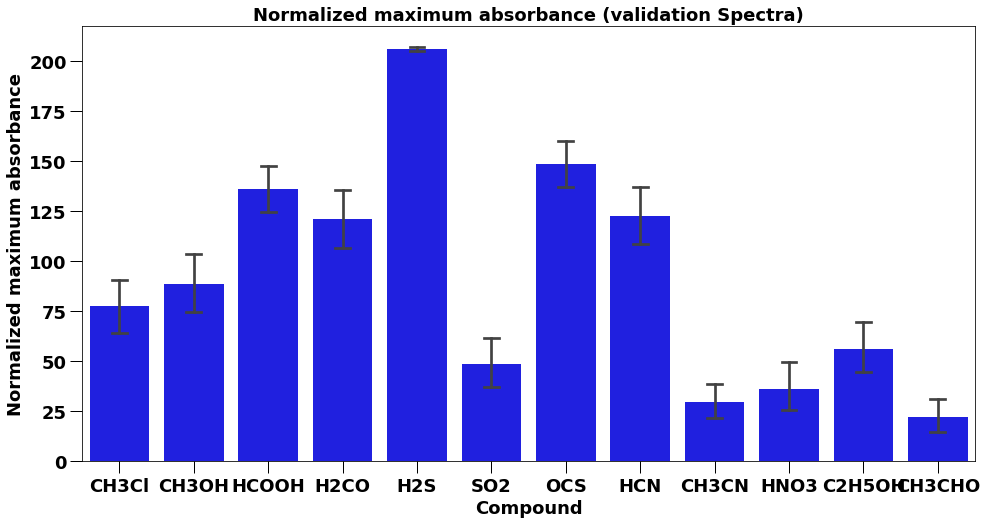

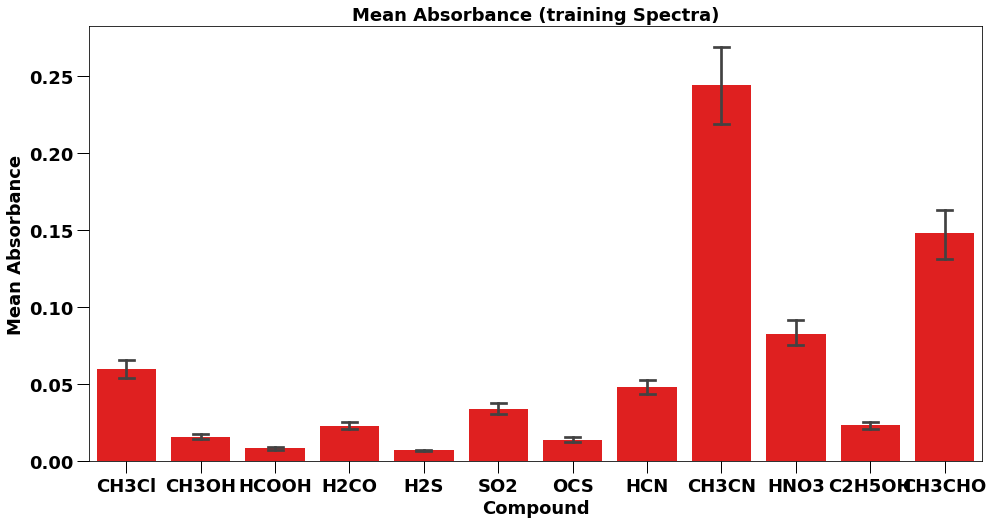

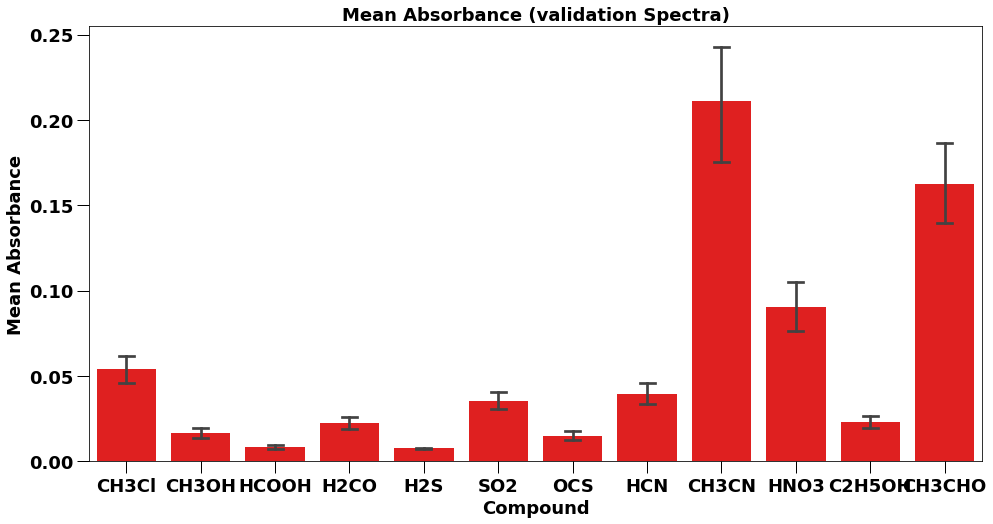

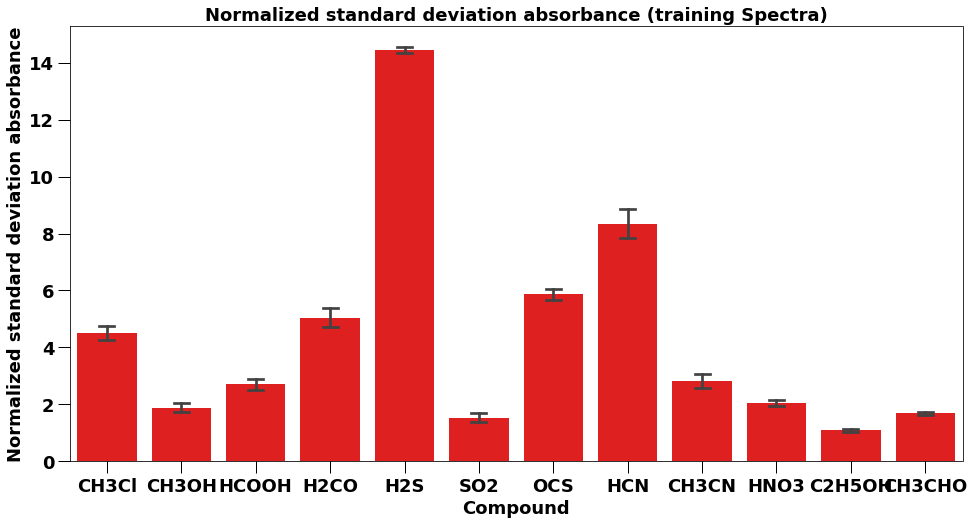

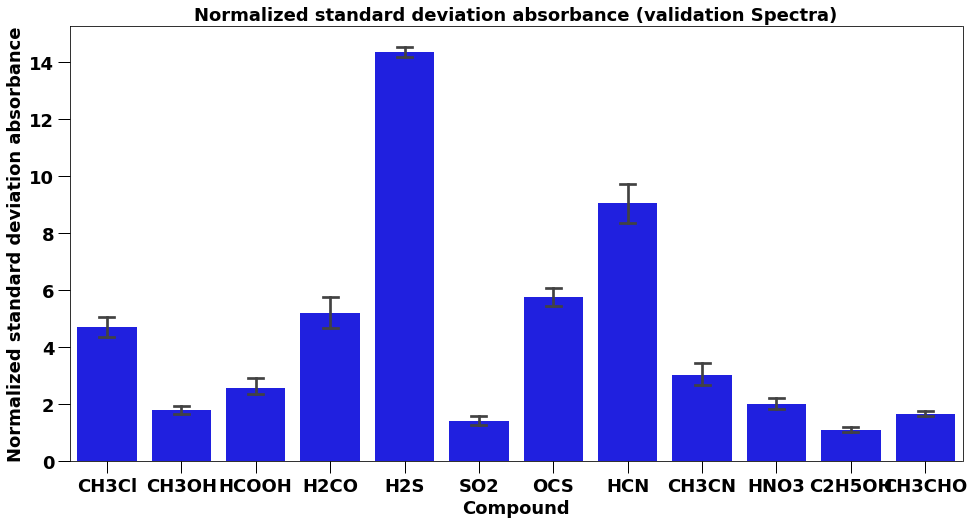

In [10]:
plot_compound_counts(train_sf, 'Counts (Training Spectra)', color = 'red' )
plot_compound_counts(test_sf, 'Counts (Testing Spectra)', color = 'blue' )
plot_dataset_property(train_sf, "norm_max_abs", title = 'Normalized maximum absorbance (training Spectra)',  ylabel = 'Normalized maximum absorbance', color = 'red')
plot_dataset_property(test_sf, "norm_max_abs", title = 'Normalized maximum absorbance (validation Spectra)',  ylabel = 'Normalized maximum absorbance', color = 'blue')
plot_dataset_property(train_sf, "mean_abs", title = 'Mean Absorbance (training Spectra)',  ylabel = 'Mean Absorbance')
plot_dataset_property(test_sf, "mean_abs", title = 'Mean Absorbance (validation Spectra)',  ylabel = 'Mean Absorbance')
plot_dataset_property(train_sf, "norm_std_abs", title = 'Normalized standard deviation absorbance (training Spectra)',  ylabel = 'Normalized standard deviation absorbance', color = 'red')
plot_dataset_property(test_sf, "norm_std_abs", title = 'Normalized standard deviation absorbance (validation Spectra)',  ylabel = 'Normalized standard deviation absorbance', color = 'blue')


In [11]:
spectraframe

,0,1,2,3,4,5,6,7,8,9,...,224,225,226,227,228,labels,targets,mean_abs,norm_std_abs,norm_max_abs
0,0.000839,0.000744,0.000641,0.000483,0.000436,0.000396,0.000361,0.000114,0.000098,0.000157,...,2.447183e-03,2.200062e-03,1.993512e-03,1.789412e-03,1.568732e-03,CH3Cl,0,0.085247,3.457232,34.626317
1,0.001436,0.001310,0.001265,0.001164,0.001100,0.001032,0.000993,0.000950,0.000960,0.001265,...,4.616761e-03,4.125359e-03,3.711427e-03,3.389000e-03,3.107170e-03,CH3Cl,0,0.109811,3.019012,24.664128
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.042881e-57,1.852548e-57,4.158853e-57,1.643571e-56,1.026757e-54,CH3Cl,0,0.032450,5.374430,96.705015
3,0.000736,0.000612,0.000471,0.000423,0.000382,0.000347,0.000000,0.000000,0.000000,0.000034,...,2.140642e-03,1.903000e-03,1.699188e-03,1.505340e-03,1.032503e-03,CH3Cl,0,0.079957,3.575563,37.602052
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,8.252283e-58,3.292975e-57,1.026690e-54,CH3Cl,0,0.016174,6.618444,147.881994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1963,0.004147,0.004887,0.004637,0.001771,0.002681,0.003597,0.003974,0.033576,0.016339,0.030489,...,5.665483e-01,6.643810e-01,2.089046e-01,1.040578e-01,2.760949e-02,CH3CHO,11,0.061872,1.893636,27.128915
1964,0.009573,0.010554,0.016534,0.006650,0.008734,0.011652,0.026568,0.121507,0.047725,0.068742,...,1.602626e+00,1.388449e+00,6.743952e-01,3.561444e-01,1.136959e-01,CH3CHO,11,0.166181,1.580007,9.301269
1965,0.009669,0.010676,0.016714,0.006751,0.008847,0.011841,0.027075,0.122662,0.048394,0.069268,...,1.618317e+00,1.398770e+00,6.821398e-01,3.604988e-01,1.156360e-01,CH3CHO,11,0.167967,1.576288,9.297274
1966,0.016704,0.019250,0.026494,0.014613,0.017417,0.024477,0.055747,0.167275,0.081007,0.092281,...,2.297185e+00,1.870319e+00,1.045146e+00,5.694343e-01,2.224099e-01,CH3CHO,11,0.253470,1.428838,8.884601


In [12]:
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', -1)
 
# # All dataframes hereafter reflect these changes.
# display(spectraframe)

In [13]:
# load experiments

In [14]:
s.load_experiments()

Number of Experimental Compounds: 6
Number of Spectrum: 6
Total Number of Spectra: 36
Sample Size of training data: 229
Rows discarded: 22


In [15]:
SpectraFrame = pd.DataFrame(s.exp_spectra)
SpectraFrame['labels'] = [s.labels[i] for i in s.exp_targets]
SpectraFrame['targets'] =  s.exp_targets
spectraframe = SpectraFrame 

In [16]:
spectraframe

,0,1,2,3,4,5,6,7,8,9,...,221,222,223,224,225,226,227,228,labels,targets
0,0.021161,0.003207,0.008260,0.004305,0.006391,0.009382,0.008719,0.002037,0.009672,0.013707,...,0.019573,0.033666,0.019594,0.026439,0.036368,0.055141,0.091894,0.059073,C2H5OH,10
1,0.078369,-0.002726,0.021459,0.005558,0.016309,0.022440,0.022436,0.008364,0.028780,0.041699,...,0.065458,0.093532,0.077197,0.097533,0.125323,0.192871,0.257863,0.209845,C2H5OH,10
2,0.040897,-0.006783,0.008724,-0.003016,0.003256,0.010492,0.007432,-0.005333,0.011033,0.019502,...,0.032164,0.056198,0.037537,0.048427,0.069019,0.113686,0.170761,0.123080,C2H5OH,10
3,0.015533,0.011043,0.011586,0.010814,0.012059,0.010162,0.011168,0.011532,0.010819,0.011937,...,0.015776,0.016687,0.011457,0.017482,0.018454,0.017182,0.025295,0.020484,C2H5OH,10
4,0.039654,0.003349,0.014764,0.005545,0.011120,0.016808,0.013637,0.002650,0.016279,0.021894,...,0.032718,0.053457,0.033963,0.041522,0.059075,0.090823,0.144031,0.100862,C2H5OH,10
5,0.052576,0.003186,0.018738,0.006975,0.013260,0.020490,0.017432,0.004668,0.021032,0.029501,...,0.042167,0.066193,0.047543,0.058420,0.079025,0.123683,0.180762,0.133072,C2H5OH,10
6,0.002343,0.001574,-0.001325,0.001040,0.002465,-0.000024,0.002098,0.001048,0.001305,0.000492,...,0.002109,-0.000379,0.002234,0.004066,0.003991,-0.000197,0.001766,-0.001026,HCOOH,2
7,0.005768,0.000783,-0.000908,-0.000330,0.001917,-0.000484,0.002592,-0.000620,0.004180,-0.000596,...,0.000705,0.002698,0.002371,0.002946,0.004053,-0.000829,0.001270,0.000327,HCOOH,2
8,0.000014,-0.007507,-0.003859,-0.011385,-0.010613,-0.004144,-0.005984,-0.011933,0.009883,-0.000479,...,-0.004834,0.006907,-0.004323,-0.016333,-0.007510,-0.005560,-0.013865,-0.002063,HCOOH,2
9,-0.003326,-0.007678,-0.002594,-0.006270,-0.006612,-0.002195,-0.005586,-0.011212,-0.003612,-0.009893,...,-0.001542,0.004664,-0.001134,-0.009800,-0.003160,-0.001894,-0.008690,0.000223,HCOOH,2


In [17]:
spectraframe['mean_abs'] = spectraframe.drop(labels=['labels','targets'],axis = 1).mean(axis = 1)
spectraframe['norm_std_abs'] = spectraframe.drop(labels=['labels','targets'],axis = 1).std(axis = 1)/spectraframe.drop(labels=['labels','targets'],axis = 1).mean(axis = 1)
spectraframe['norm_max_abs'] = spectraframe.drop(labels=['labels','targets'],axis = 1).max(axis = 1)/spectraframe.drop(labels=['labels','targets'],axis = 1).mean(axis = 1)

(<Figure size 1152x648 with 1 Axes>,
 <AxesSubplot:title={'center':'counts (experimental spectra)'}, xlabel='Compound', ylabel='Count'>)

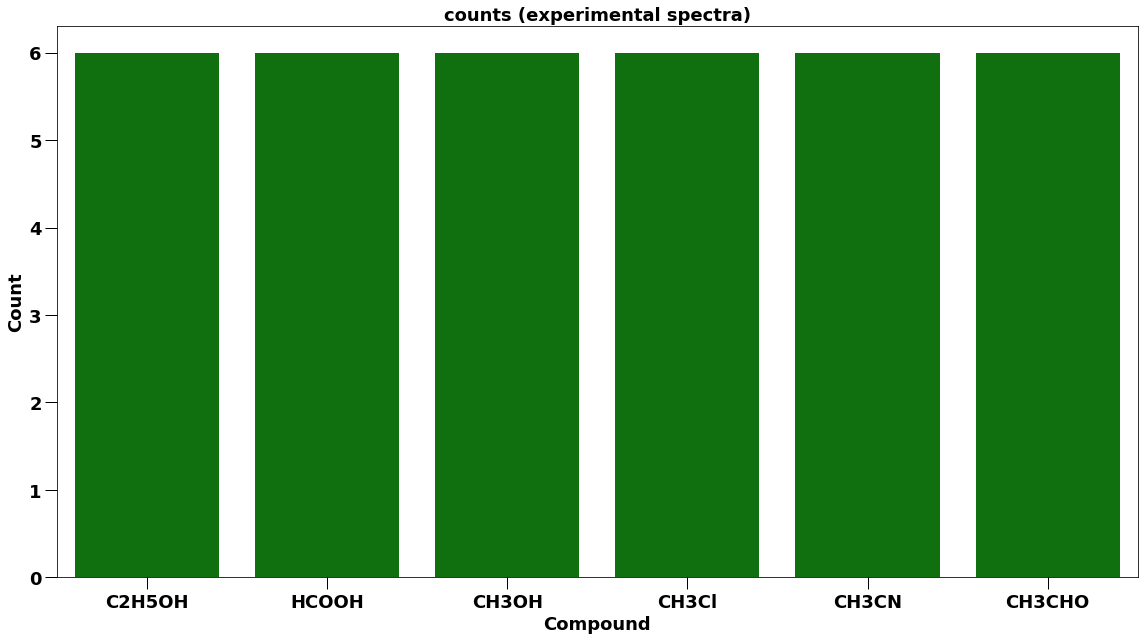

In [18]:
plot_compound_counts(spectraframe, title = 'counts (experimental spectra)', color = 'green', save_to_file = True)

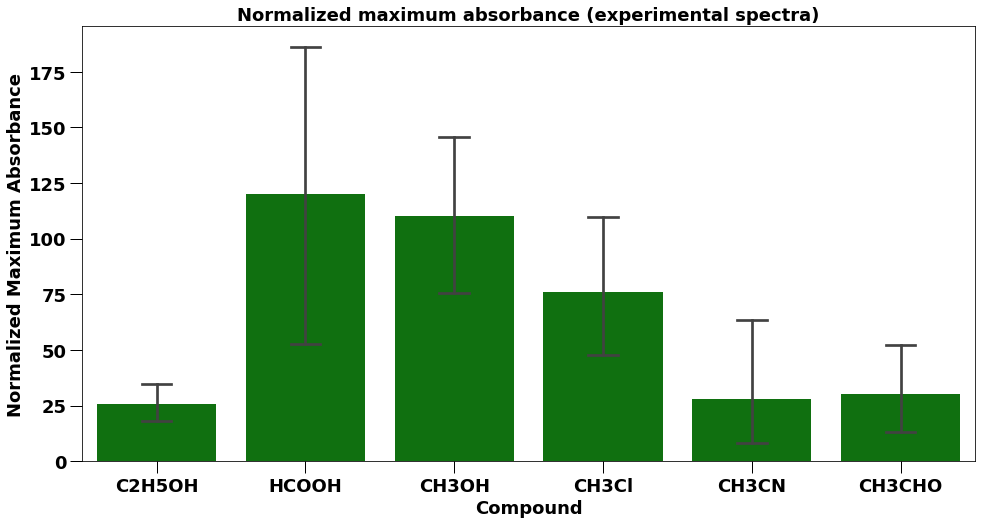

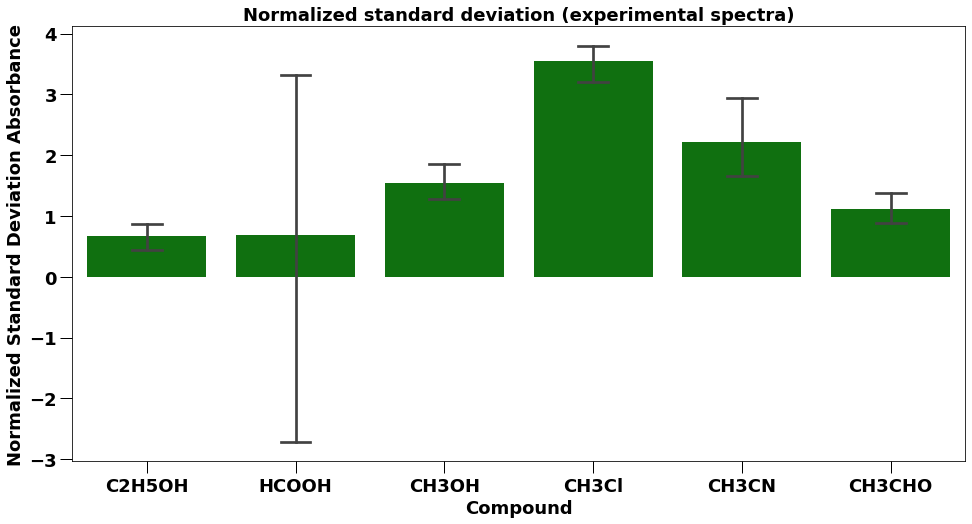

In [19]:
plot_dataset_property(spectraframe, 'norm_max_abs', title = 'Normalized maximum absorbance (experimental spectra)',  ylabel = 'Normalized Maximum Absorbance', color = 'green', save_to_file = True)    
plot_dataset_property(spectraframe, 'norm_std_abs', title = 'Normalized standard deviation (experimental spectra)',  ylabel = 'Normalized Standard Deviation Absorbance', color = 'green', save_to_file = True)    

## notebook ends